In [1]:
scores_orig = '../out/ko_scores.txt'
scores_rev = '../out/rev_scores.txt'
inter = '../out/rev_inter.txt'
intercorr = '../out/rev_inter_corr.txt'
intra = '../out/rev_intra.txt'
intracorr = '../out/rev_intra_corr.txt'
intras = '../out/rev_intra_shuffle.txt'
intrascorr = '../out/rev_intra_shuffle_corr.txt'
dev = '../out/deviating.tsv'
rdev = '../out/deviating_rev.tsv'
sgd = '../out/SGD_features.tab'

In [2]:
%matplotlib inline

import seaborn as sns
from matplotlib import colors as mplcolors
import matplotlib.pyplot as plt

sns.set_style('white')

plt.rc('font', size=12)

In [3]:
import itertools
import numpy as np
import pandas as pd
from scipy import stats

In [4]:
strains = ['S288C', 'Y55',
           'UWOP', 'YPS']
cstrains = {x: c
            for x, c in zip(strains, sns.color_palette('Set1', len(strains)))}

In [5]:
g = pd.read_table(sgd, sep='\t', header=None)
gn = g[g[1] == 'ORF'].set_index(3)[4].dropna().to_dict()
rgn = g[g[1] == 'ORF'].set_index(4)[3].dropna().to_dict()
gd = g[g[1] == 'ORF'].set_index(3)[15].dropna().to_dict()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: read_table is deprecated, use read_csv instead.
  """Entry point for launching an IPython kernel.


In [6]:
m = pd.read_csv(scores_orig, sep='\t')
n = pd.read_csv(scores_rev, sep='\t')

In [7]:
m['phenotype'] = m['qvalue'] < 0.05
n['phenotype'] = n['qvalue'] < 0.05

In [8]:
m['signed-qvalue'] = np.sign(m['score']) * -np.log10(m['qvalue'])
n['signed-qvalue'] = np.sign(n['score']) * -np.log10(n['qvalue'])

In [9]:
m = m.set_index(['strain', 'gene', 'condition']).sort_index()
n = n.set_index(['strain', 'gene', 'condition']).sort_index()

In [10]:
t = n[n['subset'] == 'OLD']
u = n[n['subset'] == 'NEW']

In [11]:
ii = pd.read_csv(inter, sep='\t', header=None)
ii.columns = ['strain',
              'gene',
              'x', 'y']
ic = pd.read_csv(intercorr, sep='\t', header=None)
ic.columns = ['strain',
              'gene',
              'r', 'p']

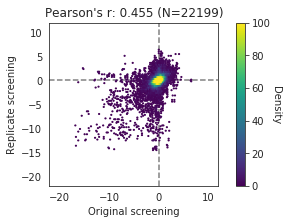

In [12]:
plt.figure(figsize=(3.5, 3))

gs = plt.GridSpec(1, 2, width_ratios=[4, 0.2])
ax1 = plt.subplot(gs[0])
ax2 = plt.subplot(gs[1])

plt.sca(ax1)
hb = plt.hexbin(ii['x'], ii['y'], gridsize=100, cmap='viridis', vmax=100, rasterized=True)

cbar = plt.colorbar(hb, cax=ax2)
cbar.set_label('Density', rotation=270, labelpad=10)

plt.draw()

counts = hb.get_array()
colors = hb.get_facecolors()
colors[:, 3] = counts > 0
hb.set_facecolors(colors)

plt.xlim(-22, 12)
plt.ylim(-22, 12)

plt.axvline(0,
            color='grey',
            linestyle='dashed',
            zorder=0)
plt.axhline(0,
            color='grey',
            linestyle='dashed',
            zorder=0)

plt.xlabel('Original screening')
plt.ylabel('Replicate screening')

rv, p = stats.pearsonr(ii['x'],
                       ii['y'])

plt.title('Pearson\'s r: %.3f (N=%d)' % (rv, ii.shape[0]))

plt.savefig('interscreening_reproducibility.png',
            dpi=300, bbox_inches='tight',
            transparent=True)
plt.savefig('interscreening_reproducibility.svg',
            dpi=300, bbox_inches='tight',
            transparent=True);

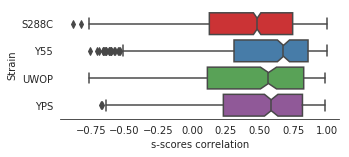

In [13]:
plt.figure(figsize=(5, 2))

sns.boxplot(data=ic,
            x='r',
            y='strain',
            notch=True,
            order=strains,
            palette=cstrains)

plt.xlabel('s-scores correlation')
plt.ylabel('Strain')
sns.despine(left=True)

plt.savefig('interscreening_reproducibility_boxplot.png',
            dpi=300, bbox_inches='tight',
            transparent=True)
plt.savefig('interscreening_reproducibility_boxplot.svg',
            dpi=300, bbox_inches='tight',
            transparent=True);

In [14]:
genes = {x[1] for x in t.index}.intersection({x[1] for x in u.index}) - {'WT'}
conditions = {x[2] for x in t.index}.intersection({x[2] for x in u.index})

In [15]:
ii = pd.read_csv(intra, sep='\t', header=None)
ii.columns = ['strain',
              'gene',
              'x', 'y']
ic = pd.read_csv(intracorr, sep='\t', header=None)
ic.columns = ['strain',
              'gene',
              'r', 'p']

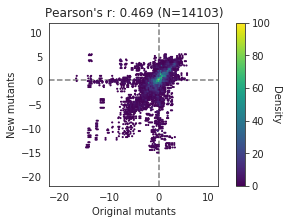

In [16]:
plt.figure(figsize=(3.5, 3))

gs = plt.GridSpec(1, 2, width_ratios=[4, 0.2])
ax1 = plt.subplot(gs[0])
ax2 = plt.subplot(gs[1])

plt.sca(ax1)
hb = plt.hexbin(ii['y'], ii['x'], gridsize=100, cmap='viridis', vmax=100, rasterized=True)

cbar = plt.colorbar(hb, cax=ax2)
cbar.set_label('Density', rotation=270, labelpad=10)

plt.draw()

counts = hb.get_array()
colors = hb.get_facecolors()
colors[:, 3] = counts > 0
hb.set_facecolors(colors)

plt.xlim(-22, 12)
plt.ylim(-22, 12)

plt.axvline(0,
            color='grey',
            linestyle='dashed',
            zorder=0)
plt.axhline(0,
            color='grey',
            linestyle='dashed',
            zorder=0)

plt.xlabel('Original mutants')
plt.ylabel('New mutants')

rv, p = stats.pearsonr(ii['x'],
                       ii['y'])

plt.title('Pearson\'s r: %.3f (N=%d)' % (rv, ii.shape[0]))

plt.savefig('intrascreening_reproducibility.png',
            dpi=300, bbox_inches='tight',
            transparent=True)
plt.savefig('intrascreening_reproducibility.svg',
            dpi=300, bbox_inches='tight',
            transparent=True);

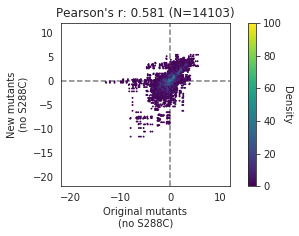

In [17]:
plt.figure(figsize=(3.5, 3))

gs = plt.GridSpec(1, 2, width_ratios=[4, 0.2])
ax1 = plt.subplot(gs[0])
ax2 = plt.subplot(gs[1])

plt.sca(ax1)
hb = plt.hexbin(ii[ii['strain'] != 'S288C']['y'],
                ii[ii['strain'] != 'S288C']['x'],
                gridsize=100, cmap='viridis', vmax=100, rasterized=True)

cbar = plt.colorbar(hb, cax=ax2)
cbar.set_label('Density', rotation=270, labelpad=10)

plt.draw()

counts = hb.get_array()
colors = hb.get_facecolors()
colors[:, 3] = counts > 0
hb.set_facecolors(colors)

plt.xlim(-22, 12)
plt.ylim(-22, 12)

plt.axvline(0,
            color='grey',
            linestyle='dashed',
            zorder=0)
plt.axhline(0,
            color='grey',
            linestyle='dashed',
            zorder=0)

plt.xlabel('Original mutants\n(no S288C)')
plt.ylabel('New mutants\n(no S288C)')

rv, p = stats.pearsonr(ii[ii['strain'] != 'S288C']['x'],
                       ii[ii['strain'] != 'S288C']['y'])

plt.title('Pearson\'s r: %.3f (N=%d)' % (rv, ii.shape[0]))

plt.savefig('intrascreening_reproducibility-noref.png',
            dpi=300, bbox_inches='tight',
            transparent=True)
plt.savefig('intrascreening_reproducibility-noref.svg',
            dpi=300, bbox_inches='tight',
            transparent=True);

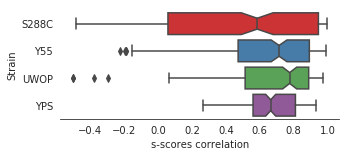

In [18]:
plt.figure(figsize=(5, 2))

sns.boxplot(data=ic,
            x='r',
            y='strain',
            notch=True,
                        order=strains,
            palette=cstrains)

plt.xlabel('s-scores correlation')
plt.ylabel('Strain')
sns.despine(left=True)

plt.savefig('intrascreening_reproducibility_boxplot.png',
            dpi=300, bbox_inches='tight',
            transparent=True)
plt.savefig('intrascreening_reproducibility_boxplot.svg',
            dpi=300, bbox_inches='tight',
            transparent=True);

In [19]:
ii = pd.read_csv(intras, sep='\t', header=None)
ii.columns = ['strain1',
              'strain2',
              'gene',
              'x', 'y']
ic = pd.read_csv(intrascorr, sep='\t', header=None)
ic.columns = ['strain1',
              'strain2',
              'gene',
              'r', 'p']

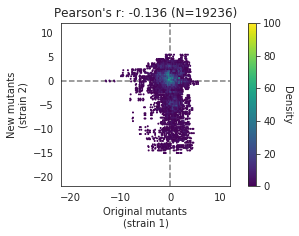

In [20]:
plt.figure(figsize=(3.5, 3))

gs = plt.GridSpec(1, 2, width_ratios=[4, 0.2])
ax1 = plt.subplot(gs[0])
ax2 = plt.subplot(gs[1])

plt.sca(ax1)
hb = plt.hexbin(ii['y'], ii['x'], gridsize=100, cmap='viridis', vmax=100, rasterized=True)

cbar = plt.colorbar(hb, cax=ax2)
cbar.set_label('Density', rotation=270, labelpad=10)

plt.draw()

counts = hb.get_array()
colors = hb.get_facecolors()
colors[:, 3] = counts > 0
hb.set_facecolors(colors)

plt.xlim(-22, 12)
plt.ylim(-22, 12)

plt.axvline(0,
            color='grey',
            linestyle='dashed',
            zorder=0)
plt.axhline(0,
            color='grey',
            linestyle='dashed',
            zorder=0)

plt.xlabel('Original mutants\n(strain 1)')
plt.ylabel('New mutants\n(strain 2)')

rv, p = stats.pearsonr(ii['x'],
                       ii['y'])

plt.title('Pearson\'s r: %.3f (N=%d)' % (rv, ii.shape[0]))

plt.savefig('intrascreening_shuffle_reproducibility.png',
            dpi=300, bbox_inches='tight',
            transparent=True)
plt.savefig('intrascreening_shuffle_reproducibility.svg',
            dpi=300, bbox_inches='tight',
            transparent=True);

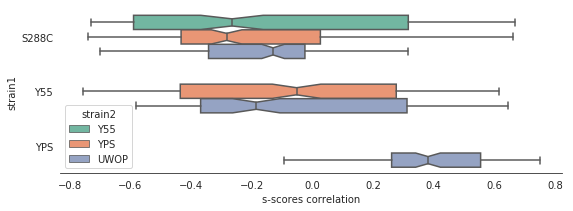

In [21]:
plt.figure(figsize=(9, 3))

sns.boxplot(data=ic,
            x='r',
            y='strain1',
            hue='strain2',
            notch=True,
            palette=sns.color_palette('Set2', 4))

plt.xlabel('s-scores correlation')
sns.despine(left=True);